In [1]:
# https://www.tensorflow.org/tutorials/images/classification 참고하기


import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
data_dir = '[Dataset]FoodImages'
data_dir = pathlib.Path(data_dir)

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg'))) + len(list(data_dir.glob('*/*.png')))
print(image_count)

8574


In [4]:
batch_size = 32
img_height = 200
img_width = 200

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=256,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8574 files belonging to 18 classes.
Using 6860 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=256,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8574 files belonging to 18 classes.
Using 1714 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['고혈압 - 김치', '고혈압 - 새우튀김', '고혈압 - 소세지 야채볶음', '고혈압 - 오징어볶음', '고혈압 - 피자', '당뇨 - 도넛', '당뇨 - 셔벗', '당뇨 - 자장면', '당뇨 - 케이크', '당뇨- 핫도그', '위염 - 감자튀김', '위염 - 곱창', '위염 - 떡국', '위염 - 마라탕', '위염,저혈압 - 삼겹살', '저혈압 - 가지볶음', '저혈압 - 김치찌개', '저혈압 - 바나나']


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50684 (\N{HANGUL SYLLABLE YEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3

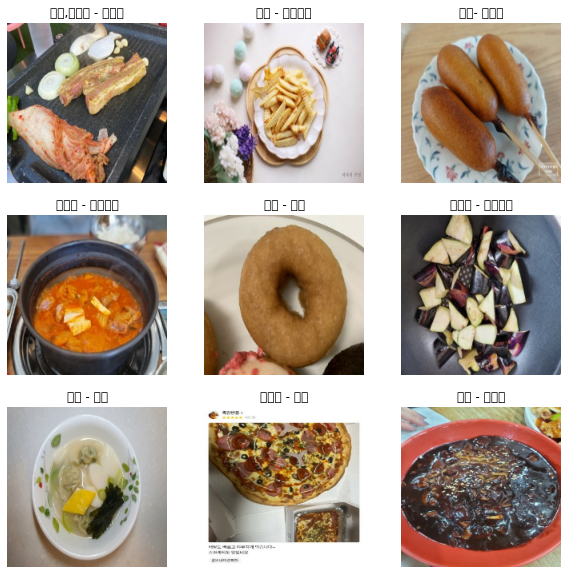

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 200, 200, 3)
(32,)


In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [12]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.02446068 0.9200674


In [13]:
num_classes = 18

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        1

In [17]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/50
215/215 [==============================] - 82s 380ms/step - loss: 1.4380 - accuracy: 0.5429 - val_loss: 1.5100 - val_accuracy: 0.4971
Epoch 2/50
215/215 [==============================] - 78s 362ms/step - loss: 1.0867 - accuracy: 0.6500 - val_loss: 1.4229 - val_accuracy: 0.5478
Epoch 3/50
215/215 [==============================] - 80s 372ms/step - loss: 0.7288 - accuracy: 0.7668 - val_loss: 1.4465 - val_accuracy: 0.5607
Epoch 4/50
215/215 [==============================] - 80s 374ms/step - loss: 0.4302 - accuracy: 0.8650 - val_loss: 1.6963 - val_accuracy: 0.5204
Epoch 5/50
215/215 [==============================] - 81s 375ms/step - loss: 0.2313 - accuracy: 0.9283 - val_loss: 1.9287 - val_accuracy: 0.5642
Epoch 6/50
215/215 [==============================] - 81s 376ms/step - loss: 0.1273 - accuracy: 0.9624 - val_loss: 2.1555 - val_accuracy: 0.5735
Epoch 7/50
215/215 [==============================] - 81s 379ms/step - loss: 0.0575 - accuracy: 0.9831 - val_loss: 2.7246 - val_ac

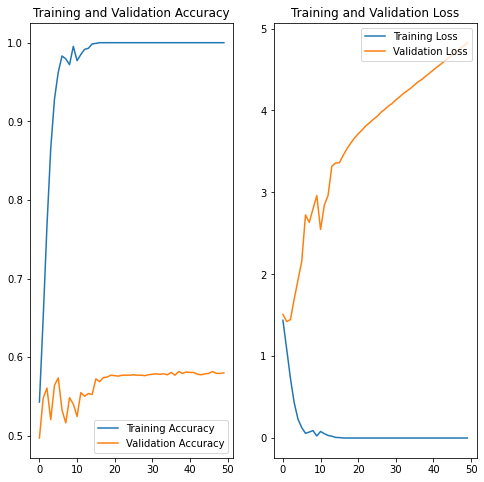

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

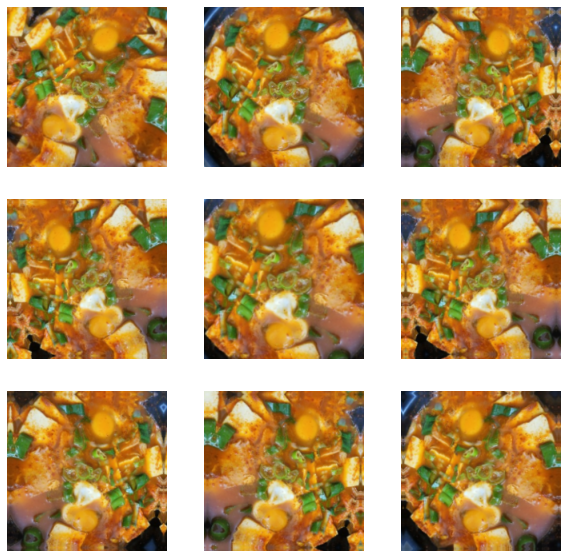

In [22]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [23]:
test_dir = "C:/Users/user/수업자료/archive/DATASET/TEST/O/O_13062.jpg"
test_dir = pathlib.Path(test_dir)

img = keras.preprocessing.image.load_img(test_dir, target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\USER\\수업자료\\archive\\DATASET\\TEST\\O\\O_13062.jpg'

In [64]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [65]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 200, 200, 3)       0         
                                                                 
 rescaling_9 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 100, 100, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                

In [67]:
epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/100
215/215 [==============================] - 92s 424ms/step - loss: 2.2911 - accuracy: 0.2625 - val_loss: 2.1212 - val_accuracy: 0.3536
Epoch 2/100
215/215 [==============================] - 89s 416ms/step - loss: 1.7076 - accuracy: 0.4503 - val_loss: 1.8923 - val_accuracy: 0.4253
Epoch 3/100
215/215 [==============================] - 86s 401ms/step - loss: 1.4795 - accuracy: 0.5198 - val_loss: 1.6042 - val_accuracy: 0.4994
Epoch 4/100
215/215 [==============================] - 87s 403ms/step - loss: 1.3228 - accuracy: 0.5695 - val_loss: 1.2274 - val_accuracy: 0.5852
Epoch 5/100
215/215 [==============================] - 87s 405ms/step - loss: 1.2285 - accuracy: 0.5969 - val_loss: 1.4108 - val_accuracy: 0.5537
Epoch 6/100
215/215 [==============================] - 86s 402ms/step - loss: 1.1614 - accuracy: 0.6243 - val_loss: 1.3303 - val_accuracy: 0.5799
Epoch 7/100
215/215 [==============================] - 86s 401ms/step - loss: 1.0637 - accuracy: 0.6523 - val_loss: 1.1462 -

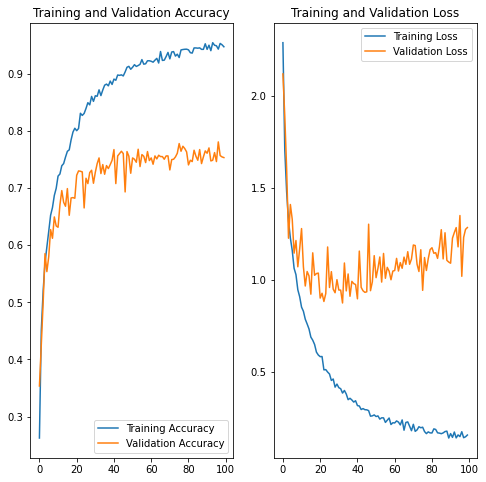

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [75]:
test_dir = "donut(test).png"
test_dir = pathlib.Path(test_dir)

img = keras.preprocessing.image.load_img(test_dir, target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 22ms/step
This image most likely belongs to 당뇨 - 도넛 with a 99.96 percent confidence.


In [32]:
# 모델 저장하기
save_path = './model.h5'
model.save(save_path)

In [37]:
#모델 불러오기
import joblib
loaded_model = joblib.load('./model.h5')
result = loaded_model.score(X_test, y_test)
print(result)

KeyError: 72